In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from imblearn.combine import SMOTETomek
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.compose import ColumnTransformer
from sklearn.metrics import ConfusionMatrixDisplay

# A logistic regression model to predict whether the patient has 10-year risk of future coronary heart disease (CHD).

**MODEL 1**

Load data

In [3]:
heart2 = pd.read_csv("/content/Heart_Disease.csv")

In [4]:
heart2.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [5]:
heart2.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [6]:
var_df = heart2.iloc[: , :15]
var_df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0


In [7]:
X = pd.DataFrame(var_df)


In [8]:
y_var = heart2.iloc[:,-1]


In [9]:
y = pd.DataFrame(y_var)
y.head()

,TenYearCHD
0,0
1,0
2,0
3,1
4,0


In [10]:
num_cols = X.select_dtypes(include = 'number').columns.to_list()
num_cols

['male',
 'age',
 'education',
 'currentSmoker',
 'cigsPerDay',
 'BPMeds',
 'prevalentStroke',
 'prevalentHyp',
 'diabetes',
 'totChol',
 'sysBP',
 'diaBP',
 'BMI',
 'heartRate',
 'glucose']

**PIPELINE**

1. Will utilize a pipeline to chain all the preprocessing steps
2. Impute missing values with mean
3. Standardize features by removing the mean and scaling to unit variance.
    they might behave badly if the individual features do not more or less     look like standard normally distributed data   

In [11]:
heart_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
     ('scaler', StandardScaler())
])

ct = ColumnTransformer(remainder = 'passthrough',
                      transformers = [
                          ('heart_pipe', heart_pipe, num_cols)
                      ])

model_1 = Pipeline([
    ('ct', ct),
    ('classifier', LogisticRegression(penalty='l2', C=1))
])

**CROSS VALIDATION**


In [12]:
# Splitting the data to train set and test set
X_train_, X_test_, y_train_, y_test_ = train_test_split(
    X,
    y,
    test_size=0.33,
    shuffle=True,
    stratify=y,#stratify enforces same proportionality in an inbalance class 
    random_state=67

)

In [13]:
# Train the model
md =model_1.fit(X_train_,  y_train_.values.ravel())

# Predict on evaluation set
preds = model_1.predict(X_test_)
preds

array([0, 0, 0, ..., 0, 0, 0])

In [14]:
predictions = preds.reshape(1399, 1)

1. Will not depend on accuracy to measure our test since our data contains imbalance class and also the nature if the study. 
2. In medical perspective its better to predict someone who does not have as positve rather than positive as not having
3. Will use Precision and Recal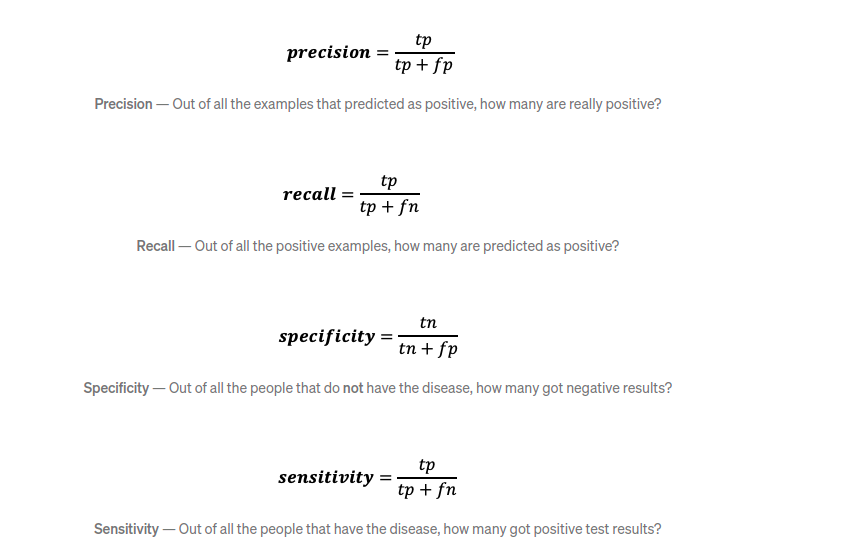

In [15]:
print(classification_report(y_test_, predictions))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92      1186
           1       0.70      0.07      0.12       213

    accuracy                           0.85      1399
   macro avg       0.78      0.53      0.52      1399
weighted avg       0.83      0.85      0.80      1399



In [16]:
cf_matrix = confusion_matrix(y_test_, predictions)
cf_matrix

array([[1180,    6],
       [ 199,   14]])

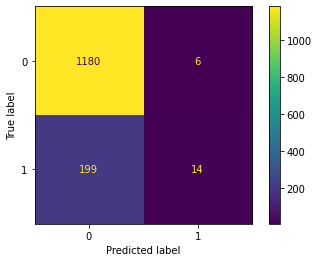

In [17]:
cm_display = ConfusionMatrixDisplay(cf_matrix).plot()

In [18]:
roc_score = roc_auc_score(y_test_, predictions)
roc_score

0.5303343388040441

With a score of 0.5 our model has failed, Its as good as coin flip or pure gues

Scores by [AcuteTesting.org](https://acutecaretesting.org/en/articles/roc-curves-what-are-they-and-how-are-they-used#:~:text=THE%20WORTHLESS%20TEST&text=It%20includes%20the%20point%20with,the%20worthless%20test%20is%200.5.)

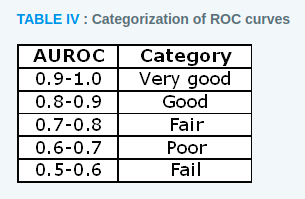

In [23]:
stats_data = pd.concat([X, y], axis=1)

In [24]:
stats_data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [27]:
stats_model = smf.logit(formula="TenYearCHD~ + totChol + male + age + currentSmoker + cigsPerDay + BPMeds	+ prevalentStroke	+ prevalentHyp + diabetes +	sysBP +	diaBP + BMI + heartRate", data=stats_data).fit()
print(stats_model.summary())

Optimization terminated successfully.
         Current function value: 0.375217
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:             TenYearCHD   No. Observations:                 4088
Model:                          Logit   Df Residuals:                     4074
Method:                           MLE   Df Model:                           13
Date:                Mon, 20 Jun 2022   Pseudo R-squ.:                  0.1104
Time:                        13:45:30   Log-Likelihood:                -1533.9
converged:                       True   LL-Null:                       -1724.2
Covariance Type:            nonrobust   LLR p-value:                 2.708e-73
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -8.0813      0.644    -12.540      0.000      -9.344      -6.818
totChol       

The p-values help determine whether the relationships that we observe in our sample also exist in the larger population. The p-value for each independent variable tests the null hypothesis that the variable has no correlation with the dependent variable.

**ODD RATIOS**

In [28]:
model_odds = pd.DataFrame(np.exp(stats_model.params), columns =['ODR'])
model_odds['Z-value']= stats_model.pvalues
model_odds[['2.5', '97.5']] = np.exp(stats_model.conf_int())
print(model_odds)

                      ODR       Z-value       2.5      97.5
Intercept        0.000309  4.511211e-36  0.000087  0.001094
totChol          1.001656  1.141963e-01  0.999602  1.003715
male             1.726055  1.119356e-07  1.410890  2.111621
age              1.067426  6.627216e-25  1.054262  1.080755
currentSmoker    1.055646  7.150799e-01  0.789307  1.411857
cigsPerDay       1.020307  5.656231e-04  1.008712  1.032035
BPMeds           1.241915  3.335624e-01  0.800524  1.926679
prevalentStroke  2.052952  1.373663e-01  0.794830  5.302530
prevalentHyp     1.208659  1.475682e-01  0.935220  1.562047
diabetes         2.000164  2.081351e-03  1.286413  3.109929
sysBP            1.015062  3.674776e-05  1.007881  1.022294
diaBP            0.997496  6.836711e-01  0.985540  1.009598
BMI              1.005678  6.371555e-01  0.982294  1.029619
heartRate        1.000130  9.736904e-01  0.992461  1.007858


**MODEL 2**

In [29]:
#Load the data
heart_df = pd.read_csv("/content/Heart_Disease.csv")

**1. EXPLORE THE DATA**

In [30]:
heart_df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [31]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6b7721fc50>,
      dtype=object)

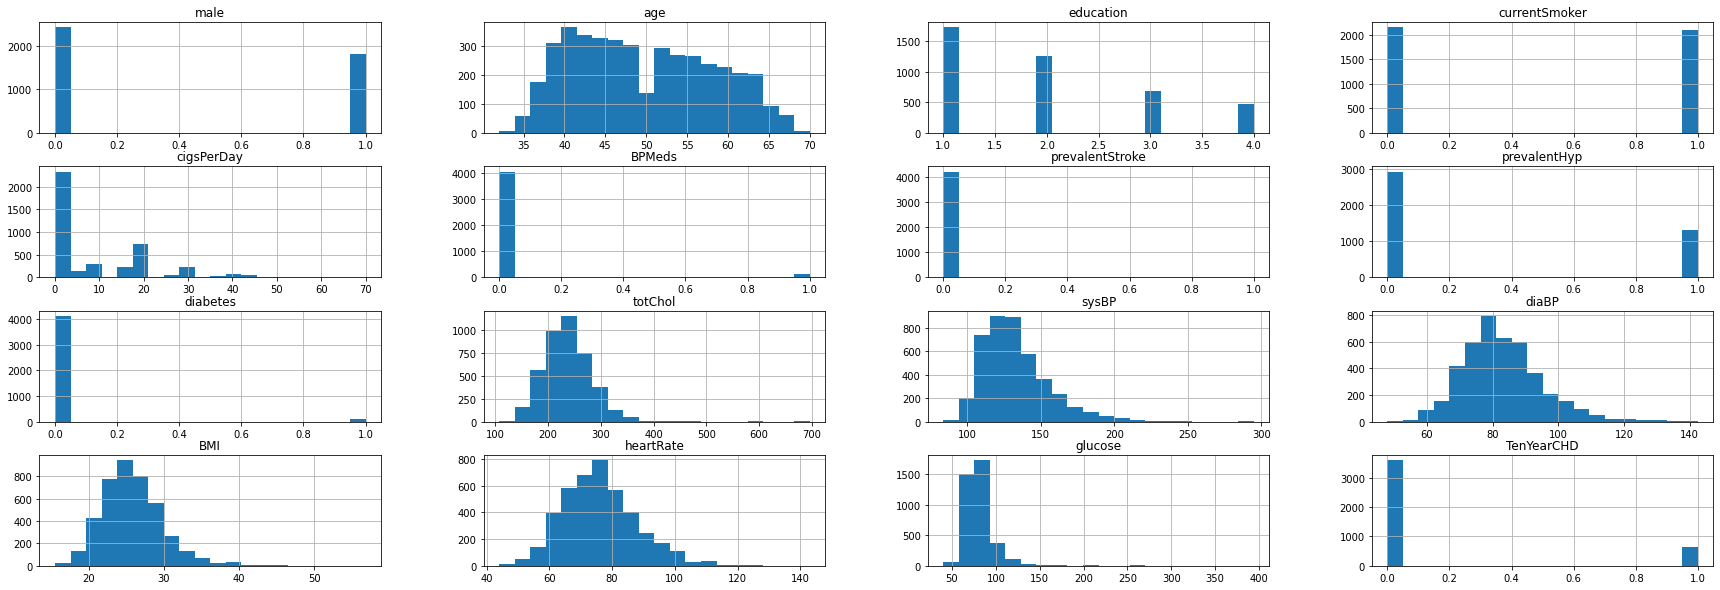

In [32]:
heart_df.hist(figsize=(30, 10), bins=20)

In [33]:
heart_df["prevalentStroke"].unique()

array([0, 1])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6b7721fb10>]],
      dtype=object)

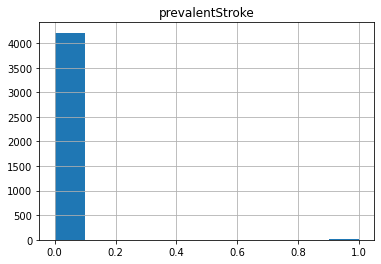

In [34]:
heart_df.hist(column="prevalentStroke")

In [35]:
heart_df["TenYearCHD"].value_counts()  

0    3594
1     644
Name: TenYearCHD, dtype: int64

**Their is inbalance in our dataset, this would result to bias ie favouring of the ones. W
ill try to balance it**

**PREPROCESS**


1.   Fill missing value
2.   Feature selection
3.   To balance the data will oversample  the rarer class by drawing additional rows with replacement
4. Convert into dumy variable
5. Scaling

In [36]:
heart_df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [37]:
heart_df.shape

(4238, 16)

### Since heartrate has only one missing column lets delete that row

In [38]:
heart_df = heart_df.dropna(subset=["heartRate"], how="any")

### Glucose with the highest missing columns, we can employ diffrent stratergy to impute missing values

In [ ]:
heart_df["glucose"].value_counts().nlargest(n=30)

In [ ]:
heart_df["glucose"].value_counts().nsmallest(n=30)

In [ ]:
np.mean(heart_df["glucose"])

81.96440633930891

In [39]:
heart_df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            0
glucose            388
TenYearCHD           0
dtype: int64

**FILL IN MISSING VALUES WITH SKLEARN SIMPLE IMPUTER**

In [40]:
imp_mean = SimpleImputer(strategy='mean')
clean_data = imp_mean.fit_transform(heart_df)

In [41]:
X = pd.DataFrame(clean_data, columns=heart_df.columns)

**FEATURE SELECTION**

In [42]:
X_features = X.iloc[:,0:15]
X_features.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1.0,39.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,195.0,106.0,70.0,26.97,80.0,77.0
1,0.0,46.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,250.0,121.0,81.0,28.73,95.0,76.0
2,1.0,48.0,1.0,1.0,20.0,0.0,0.0,0.0,0.0,245.0,127.5,80.0,25.34,75.0,70.0
3,0.0,61.0,3.0,1.0,30.0,0.0,0.0,1.0,0.0,225.0,150.0,95.0,28.58,65.0,103.0
4,0.0,46.0,3.0,1.0,23.0,0.0,0.0,0.0,0.0,285.0,130.0,84.0,23.10,85.0,85.0


In [43]:
y_labels = X.iloc[:,-1]
y_labels.head()

0    0.0
1    0.0
2    0.0
3    1.0
4    0.0
Name: TenYearCHD, dtype: float64

**SELECT BEST 10 FEATURES USING SKLEARN SELECTKBEST**

In [44]:
from sklearn.feature_selection import f_classif

In [45]:
best_features = SelectKBest(score_func=f_classif, k=10)
fit_features = best_features.fit(X_features, y_labels)

In [46]:
dfscores = pd.DataFrame(fit_features.scores_)
dfcolumns = pd.DataFrame(X_features.columns)

In [47]:
feature_scores = pd.concat([dfscores, dfcolumns], axis=1)
feature_scores.columns = ['Scores','feature']

In [ ]:
# Default score function
print(feature_scores.nlargest(10,'Scores'))

        Scores       feature
1   224.860680           age
10  206.533429         sysBP
7   136.865317  prevalentHyp
11   91.945619         diaBP
14   62.155605       glucose
8    40.621468      diabetes
0    32.943066          male
5    32.246747        BPMeds
9    28.600402       totChol
12   23.481451           BMI


In [ ]:
# chi2 test
print(feature_scores.nlargest(10,'Scores'))

        Scores       feature
10  722.475156         sysBP
14  389.923445       glucose
1   316.388843           age
9   235.894624       totChol
4   218.790289    cigsPerDay
11  154.070137         diaBP
7    91.475933  prevalentHyp
8    39.218958      diabetes
5    30.680624        BPMeds
0    18.671589          male


Best features data fram

In [48]:
X_new = X_features[["male", "age", "cigsPerDay",	"BPMeds",	"prevalentHyp",	"diabetes",	"totChol","sysBP","diaBP", "glucose"]]
X_new.head()

,male,age,cigsPerDay,BPMeds,prevalentHyp,diabetes,totChol,sysBP,diaBP,glucose
0,1.0,39.0,0.0,0.0,0.0,0.0,195.0,106.0,70.0,77.0
1,0.0,46.0,0.0,0.0,0.0,0.0,250.0,121.0,81.0,76.0
2,1.0,48.0,20.0,0.0,0.0,0.0,245.0,127.5,80.0,70.0
3,0.0,61.0,30.0,0.0,1.0,0.0,225.0,150.0,95.0,103.0
4,0.0,46.0,23.0,0.0,0.0,0.0,285.0,130.0,84.0,85.0


**LETS DEAL WITH THE IMBALANCE CLASS**

Text(0, 0.5, 'Frequency')

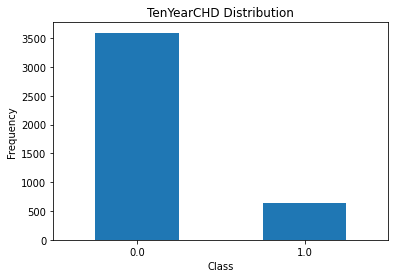

In [49]:
labels_counts = y_labels.value_counts()
labels_counts.plot(kind="bar", rot=0)
plt.title("TenYearCHD Distribution")
plt.xlabel("Class")
plt.ylabel("Frequency")


In [50]:
y_labels.shape

(4237,)

In [51]:
smk = SMOTETomek(random_state=67)
X_f_rshape,y_l_rshape = smk.fit_resample(X_new,y_labels)

In [52]:
print(X_f_rshape.shape,y_l_rshape.shape)

(7050, 10) (7050,)


In [53]:
X_f_rshape.head()

,male,age,cigsPerDay,BPMeds,prevalentHyp,diabetes,totChol,sysBP,diaBP,glucose
0,1.0,39.0,0.0,0.0,0.0,0.0,195.0,106.0,70.0,77.0
1,0.0,46.0,0.0,0.0,0.0,0.0,250.0,121.0,81.0,76.0
2,1.0,48.0,20.0,0.0,0.0,0.0,245.0,127.5,80.0,70.0
3,0.0,61.0,30.0,0.0,1.0,0.0,225.0,150.0,95.0,103.0
4,0.0,46.0,23.0,0.0,0.0,0.0,285.0,130.0,84.0,85.0


### Convert nominal variable to dummies

In [54]:
X_train_n = pd.get_dummies(X_f_rshape, columns=["prevalentHyp","diabetes","BPMeds","male"])

In [55]:
X_train_n.head()

,age,cigsPerDay,totChol,sysBP,diaBP,glucose,prevalentHyp_0.0,prevalentHyp_0.0003149991277840991,prevalentHyp_0.001552473295967416,prevalentHyp_0.006298716704580376,...,male_0.9925012847010988,male_0.9938915498420202,male_0.9980775825021148,male_0.9981019456397495,male_0.9984193175517031,male_0.9987017806735136,male_0.9988636446052295,male_0.9988934341683796,male_0.9996850008722159,male_1.0
0,39.0,0.0,195.0,106.0,70.0,77.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,46.0,0.0,250.0,121.0,81.0,76.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,48.0,20.0,245.0,127.5,80.0,70.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,61.0,30.0,225.0,150.0,95.0,103.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,46.0,23.0,285.0,130.0,84.0,85.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
X_train_n.shape

(7050, 2486)

**Scale the rest of the data**

In [57]:
standardscaler = StandardScaler()
columns_to_scale = ["sysBP", "glucose", "age", "totChol", "cigsPerDay", "diaBP"]

In [58]:
X_train_n[columns_to_scale] = standardscaler.fit_transform(X_train_n[columns_to_scale])

In [59]:
X_train_n.head()

,age,cigsPerDay,totChol,sysBP,diaBP,glucose,prevalentHyp_0.0,prevalentHyp_0.0003149991277840991,prevalentHyp_0.001552473295967416,prevalentHyp_0.006298716704580376,...,male_0.9925012847010988,male_0.9938915498420202,male_0.9980775825021148,male_0.9981019456397495,male_0.9984193175517031,male_0.9987017806735136,male_0.9988636446052295,male_0.9988934341683796,male_0.9996850008722159,male_1.0
0,-1.501711,-0.788298,-1.011226,-1.290652,-1.180179,-0.235938,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,-0.657846,-0.788298,0.222146,-0.652820,-0.282402,-0.270323,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-0.416742,0.868980,0.110022,-0.376426,-0.364018,-0.476634,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1.150436,1.697619,-0.338477,0.580322,0.860224,0.658077,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-0.657846,1.117572,1.007020,-0.270121,-0.037553,0.039144,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Model**

In [60]:
model = Pipeline([
    ('classifier', LogisticRegression(penalty='l2', C=1.5, max_iter=200))
])

In [61]:
# Splitting the data to train set and test set
X_tr, X_te, y_tr, y_te = train_test_split(
    X_train_n,
    y_l_rshape,
    test_size=0.33,
    shuffle=True,
    stratify=y_l_rshape,#stratify enforces same proportionality in an inbalance class 
    random_state=67

)

In [62]:
%%time

# Train the model
md =model.fit(X_tr,  y_tr.values.ravel())

# Predict on evaluation set
preds = model.predict(X_te)
preds

CPU times: user 5.73 s, sys: 584 ms, total: 6.32 s
Wall time: 3.38 s


In [63]:
predictions = preds.reshape(2327, 1)
predictions

array([[0.],
       [1.],
       [1.],
       ...,
       [1.],
       [0.],
       [0.]])

In [64]:
md['classifier'].coef_


array([[ 0.61111927,  0.29259243,  0.02948852, ...,  0.02230808,
         0.        , -4.76069201]])

In [65]:
results = sm.OLS(y_tr, X_tr).fit()

In [ ]:
print(results.summary())

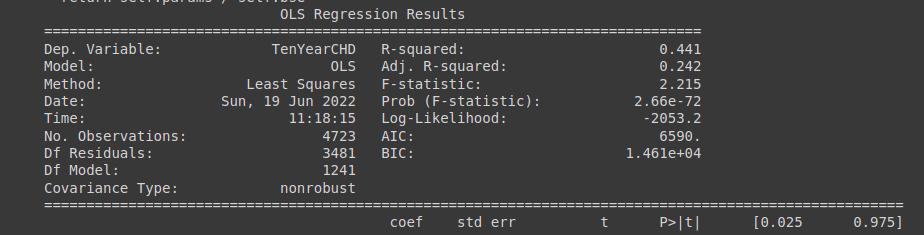

**MODEL EVALUATION**

In [66]:
def plot_roc(y_true, y_score, label_name, ax):
    '''
    Function to plot ROC CURVE used to evaluate model performance
    
    args:
            y_true- true label
            y_score- predictions
            label_name- 
            ax- object to attach plot to
       
    '''
    fpr, tpr, thresholds = roc_curve(y_true, y_score)
    ax.plot(fpr, tpr)
    ax.plot([0, 1], [0, 1], color='grey', linestyle='--')
    ax.set_xlabel('TPR')
    ax.set_ylabel('FPR')
    ax.set_title(
        f'{label_name}: AUC = {roc_auc_score(y_true, y_score):.4f}'
    
    )
    

In [67]:
y_te.head()

2408    0.0
5558    1.0
6212    1.0
1981    0.0
1398    0.0
Name: TenYearCHD, dtype: float64

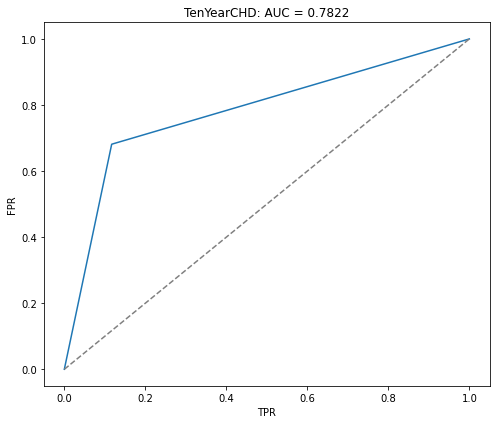

In [69]:
fig, ax = plt.subplots(1, figsize = (7, 6))

plot_roc(
    y_te,
    predictions,
    'TenYearCHD',
    ax=ax
)

fig.tight_layout()

In [68]:
score = roc_auc_score(y_te, predictions)
score

0.7821662633372042

In [70]:
# Since our model was imbalance we do not consider accuracy
model.score(X_te, y_te)

0.7821229050279329

In [71]:
c_matrix = confusion_matrix(y_te, predictions)
c_matrix

array([[1027,  136],
       [ 371,  793]])

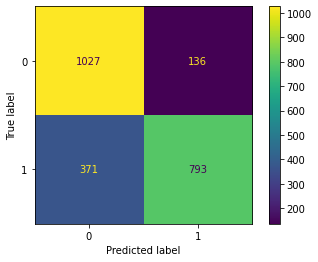

In [72]:
cm_display = ConfusionMatrixDisplay(c_matrix).plot()

In [73]:
print(classification_report(y_te, predictions))

              precision    recall  f1-score   support

         0.0       0.73      0.88      0.80      1163
         1.0       0.85      0.68      0.76      1164

    accuracy                           0.78      2327
   macro avg       0.79      0.78      0.78      2327
weighted avg       0.79      0.78      0.78      2327



**GRID SEARCH**

In [74]:
model.get_params()  

{'classifier': LogisticRegression(C=1.5, max_iter=200),
 'classifier__C': 1.5,
 'classifier__class_weight': None,
 'classifier__dual': False,
 'classifier__fit_intercept': True,
 'classifier__intercept_scaling': 1,
 'classifier__l1_ratio': None,
 'classifier__max_iter': 200,
 'classifier__multi_class': 'auto',
 'classifier__n_jobs': None,
 'classifier__penalty': 'l2',
 'classifier__random_state': None,
 'classifier__solver': 'lbfgs',
 'classifier__tol': 0.0001,
 'classifier__verbose': 0,
 'classifier__warm_start': False,
 'memory': None,
 'steps': [('classifier', LogisticRegression(C=1.5, max_iter=200))],
 'verbose': False}

In [84]:
param_grid = {'classifier__C':np.arange(0, 2, 0.5)
            }


In [ ]:
grid_search = GridSearchCV(model, param_grid, cv=5, n_jobs=2, verbose=1)
grid_search.fit(X_tr,  y_tr)

In [ ]:
grid_search.best_params_

{'classifier__C': 1.5}

### Cache the model because gridsearch takes lots of time to retrain

In [78]:
from tempfile import mkdtemp
from shutil import rmtree

cachedir = mkdtemp()
cached_model = Pipeline([
    ('classifier', LogisticRegression(penalty='l2', C=1.5, max_iter=200))
], memory=cachedir)
cached_model.fit(X_tr,  y_tr.values.ravel()) 

Pipeline(memory='/tmp/tmp1p_o6acl',
         steps=[('classifier', LogisticRegression(C=1.5, max_iter=200))])

In [ ]:
# select features on training and testing set
# Curse of dimensionality due to the increase fatures